In [6]:
import torch
import matplotlib.pyplot as plt
import EIANN.utils as ut
import EIANN.plot as pt
from EIANN._network import build_EIANN_from_config

from tqdm.autonotebook import tqdm
import numpy as np
import matplotlib.gridspec as gs
%load_ext autoreload
%autoreload 2

pt.update_plot_defaults()

train_dataloader, train_sub_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_MNIST_dataloaders(sub_dataloader_size=1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simple vanilla FF BP 
- (should be 0 angle vs BP)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_vanBP.pkl
Loading model data from 'saved_networks/EIANN_1_hidden_mnist_vanBP.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_vanBP.pkl'


<Figure size 1000x300 with 0 Axes>

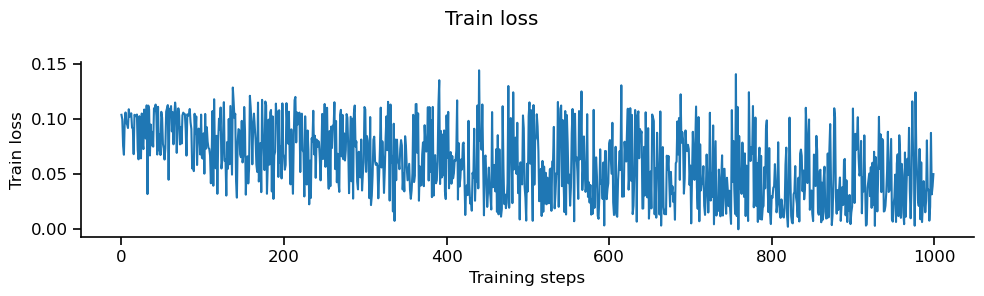

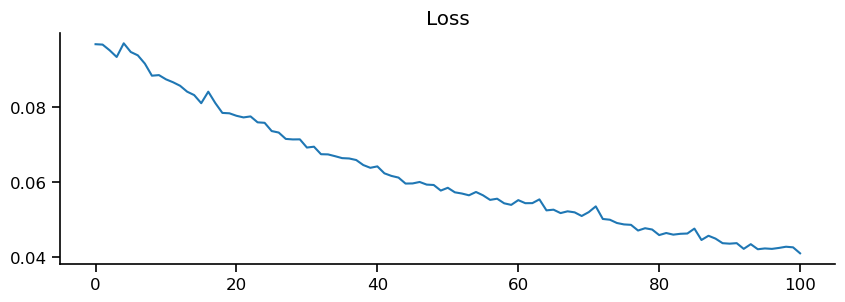

Batch accuracy = 80.30000305175781%


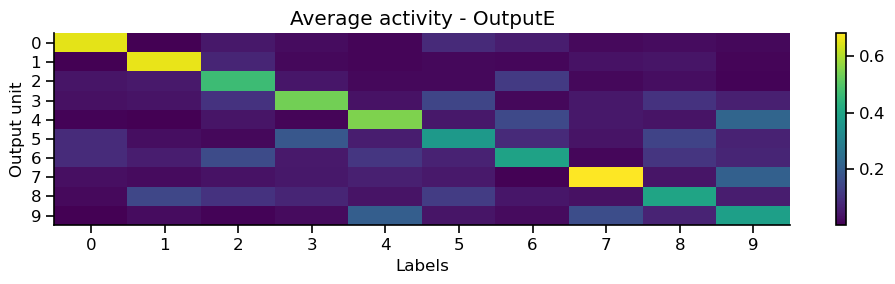

In [20]:
# Build network
network_name = "EIANN_1_hidden_mnist_vanBP"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
bp = build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
bp.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,10),
                store_history=True, 
                store_params=True,
                status_bar=True)
bp.save(path=saved_network_path)

bp.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(bp)
plt.show()

plt.figure()
plt.plot(bp.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(bp, test_dataloader)

  0%|          | 0/100 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_vanBP_bpClone.pkl


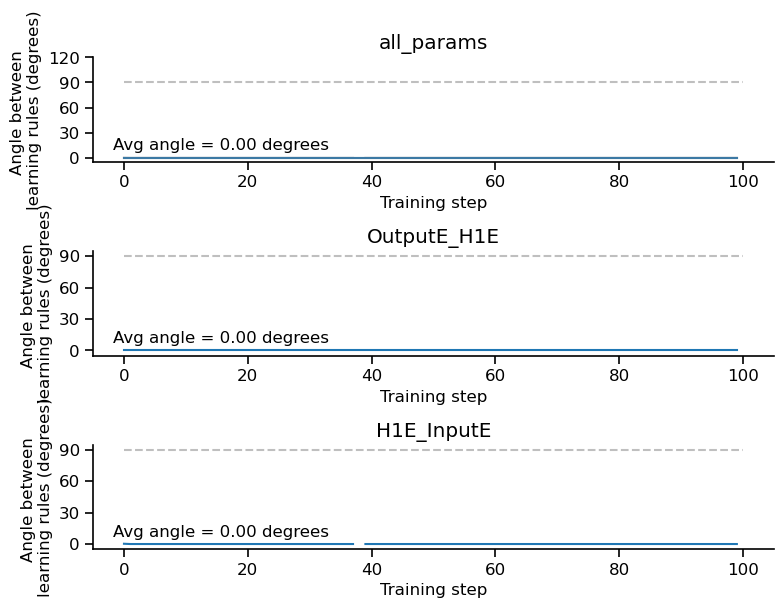

In [21]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, bp, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## Simple FF almostBP1
- (should be 0 angle vs BP, if there are no somaI)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF.pkl
Loading model data from 'saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF.pkl'


<Figure size 1000x300 with 0 Axes>

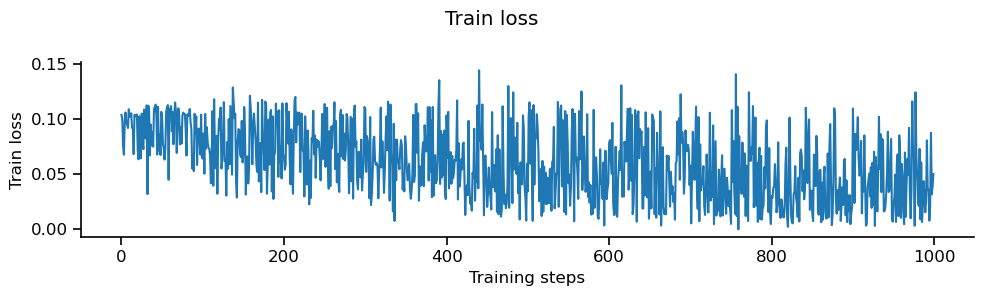

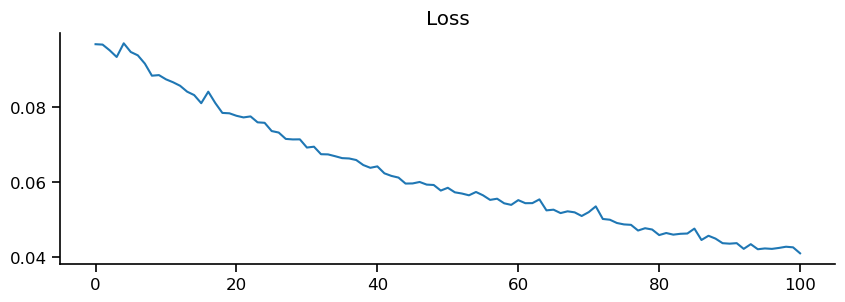

Batch accuracy = 80.30000305175781%


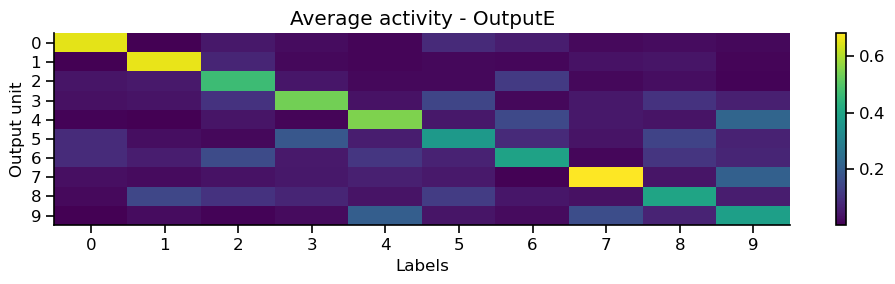

In [24]:
# Build network
network_name = "EIANN_1_hidden_mnist_almostBP1_simpleFF"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
almostBP = build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
almostBP.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,10),
                store_history=True, 
                store_params=True,
                status_bar=True)
almostBP.save(path=saved_network_path)

almostBP.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(almostBP)
plt.show()

plt.figure()
plt.plot(almostBP.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(almostBP, test_dataloader)

  0%|          | 0/100 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_almostBP1_simpleFF_bpClone.pkl


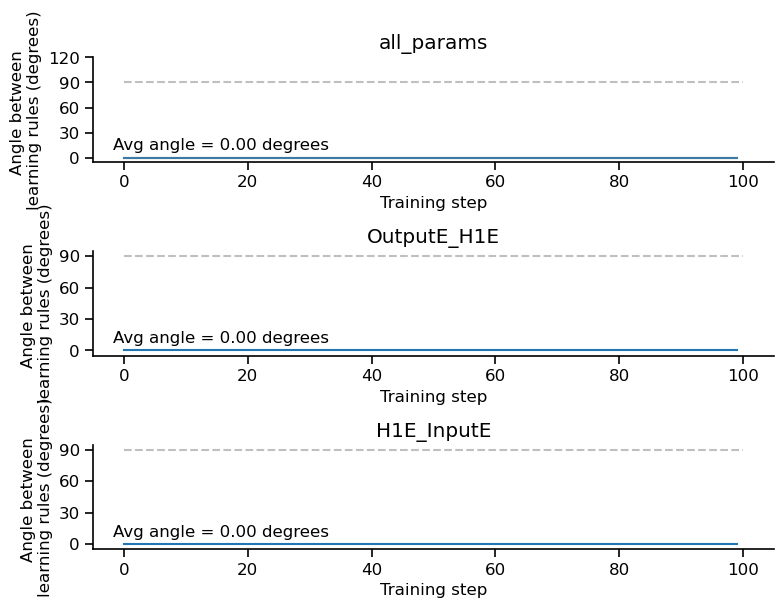

In [25]:
# # Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, almostBP, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## almostBP with dendI

In [108]:
a = torch.tensor([1,2,3])
b = torch.tensor([1,2,3])
torch.all(a==b)

tensor(True)

In [110]:
# Build network
network_name = "EIANN_1_hidden_mnist_almostBP1_simpleFF_dendI"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
almostBP = build_EIANN_from_config(config_path, network_seed=66049, projection_config_format='simplified')

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
almostBP.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,10),
                store_history=True, 
                store_params=True,
                status_bar=True)
almostBP.save(path=saved_network_path)

almostBP.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(almostBP)
plt.show()

plt.figure()
plt.plot(almostBP.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(almostBP, test_dataloader)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# # Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, almostBP, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## BP Dale

- Should also be ~0 angle vs BP
    - Slight error due to weight rectification/clipping

Loading model data from 'saved_networks/EIANN_1_hidden_mnist_bpDale.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_bpDale.pkl'


<Figure size 1000x300 with 0 Axes>

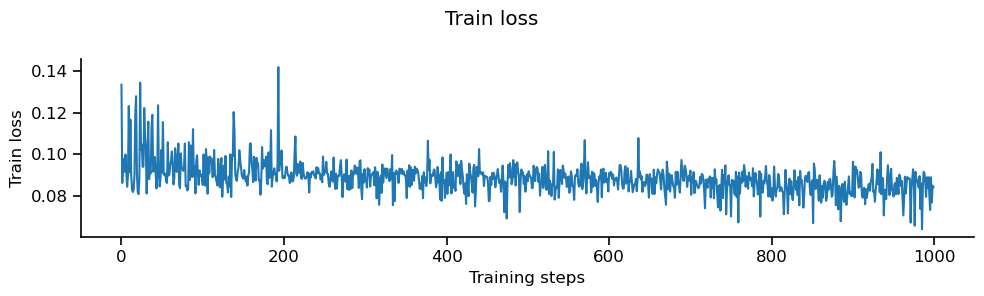

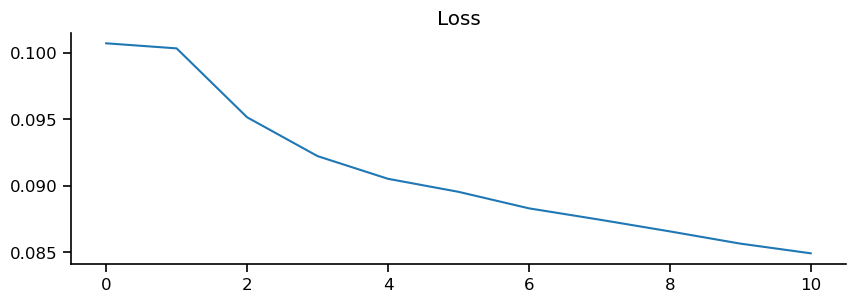

In [76]:
# Build network
network_name = "EIANN_1_hidden_mnist_bpDale"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
bpDale = build_EIANN_from_config(config_path, network_seed=66049)

# # Train network
# data_seed = 257
# data_generator.manual_seed(data_seed)
# bpDale.train(train_sub_dataloader, 
#                 test_dataloader, 
#                 epochs=1,
#                 val_interval=(0,-1,100),
#                 store_history=True, 
#                 store_params=True,
#                 status_bar=True)
# bpDale.save(path=saved_network_path)

bpDale.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(bpDale)
plt.show()

plt.figure()
plt.plot(bpDale.val_loss_history)
plt.title('Loss')
plt.show()

# pt.plot_batch_accuracy(bpDale, test_dataloader)

  0%|          | 0/10 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_bpDale_bpClone.pkl


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/utils.py:1353: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


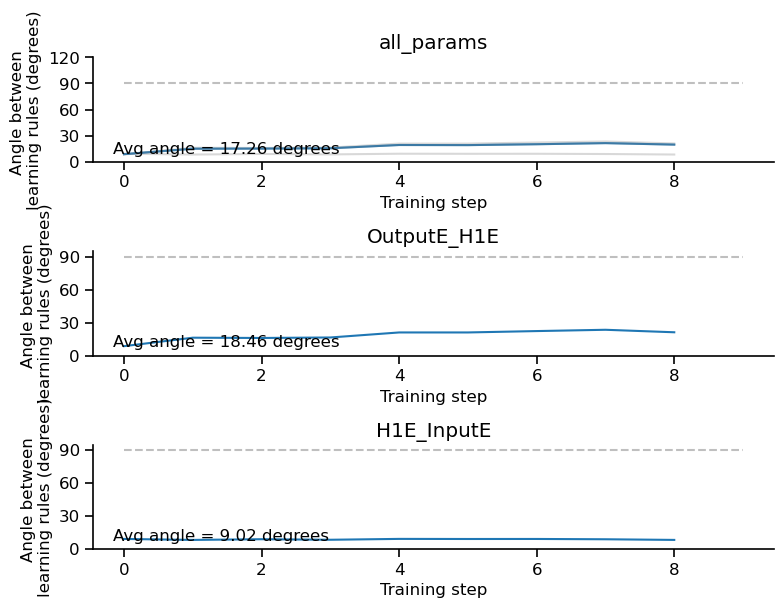

In [27]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, bpDale, batch_size=100, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stepaveraged stochastic backprop vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_bpDale_bpClone.pkl


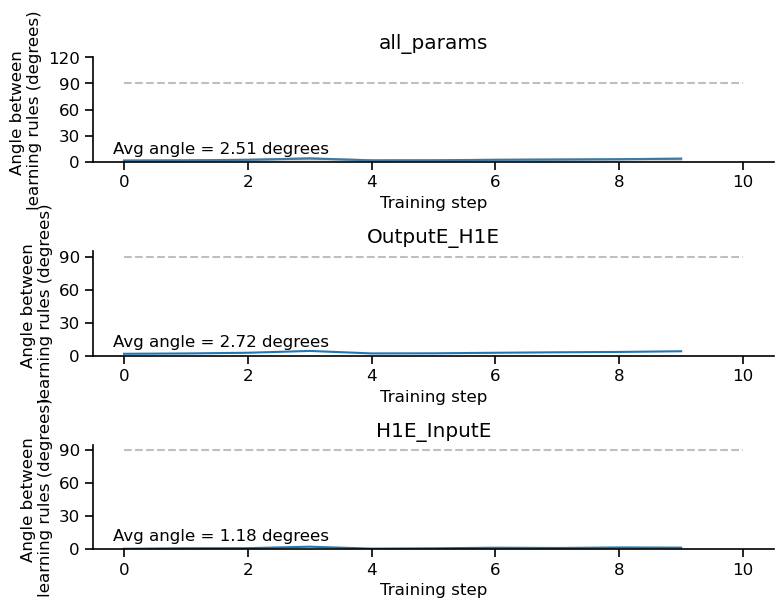

In [77]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, bpDale, batch_size=1, constrain_params=False, 
                                                    save_path=f"saved_networks/{network_name}_bpClone.pkl")

# Stochastic backprop vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## Almost BP 1: 
 - Weight transpose
 - E = dend act = b
 - Subtract forward act from dend

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/1000 [00:00<?, ?it/s]

Model saved to saved_networks/EIANN_1_hidden_mnist_almostBP1.pkl
Loading model data from 'saved_networks/EIANN_1_hidden_mnist_almostBP1.pkl'...
Loading parameters into the network...
Model successfully loaded from 'saved_networks/EIANN_1_hidden_mnist_almostBP1.pkl'


<Figure size 1000x300 with 0 Axes>

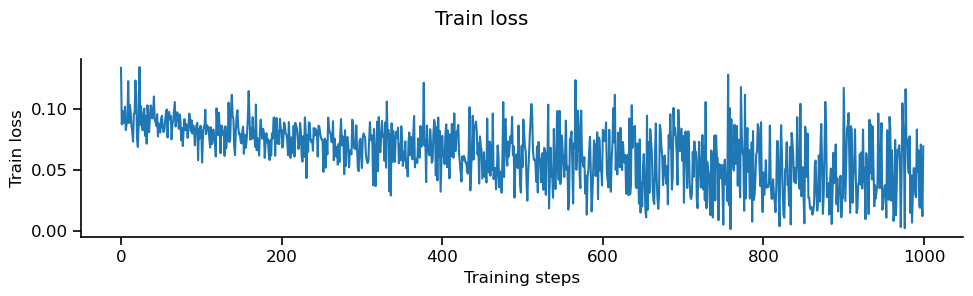

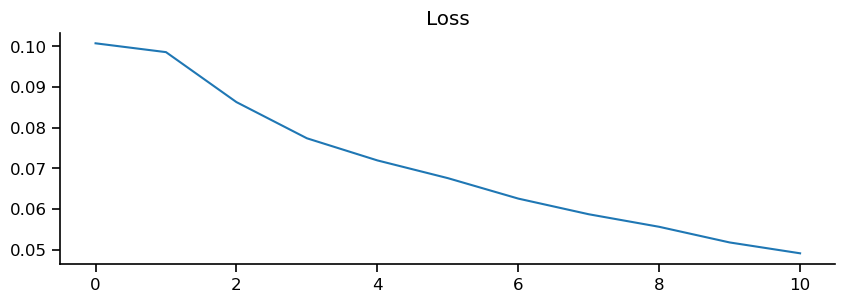

Batch accuracy = 76.94000244140625%


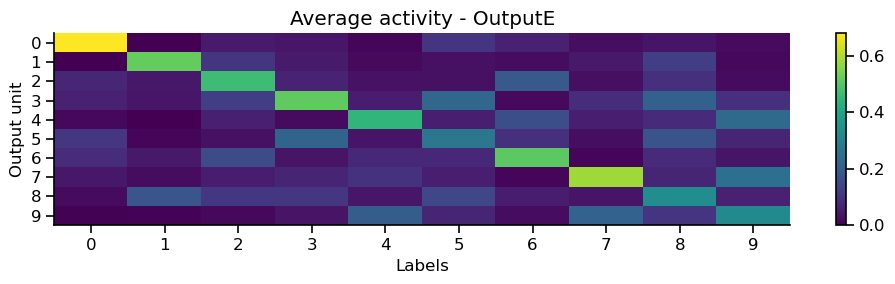

In [90]:
# Build network
network_name = "EIANN_1_hidden_mnist_almostBP1"
config_path = f"../network_config/MNIST_templates/{network_name}.yaml"
saved_network_path = f"saved_networks/{network_name}.pkl"
almostBP1 = build_EIANN_from_config(config_path, network_seed=66049)

# Train network
data_seed = 257
data_generator.manual_seed(data_seed)
almostBP1.train(train_sub_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,100),
                store_history=True, 
                store_params=True,
                status_bar=True)
almostBP1.save(path=saved_network_path)

almostBP1.load(saved_network_path)

plt.figure()
pt.plot_train_loss_history(almostBP1)
plt.show()

plt.figure()
plt.plot(almostBP1.val_loss_history)
plt.title('Loss')
plt.show()

pt.plot_batch_accuracy(almostBP1, test_dataloader)

  0%|          | 0/10 [00:00<?, ?it/s]

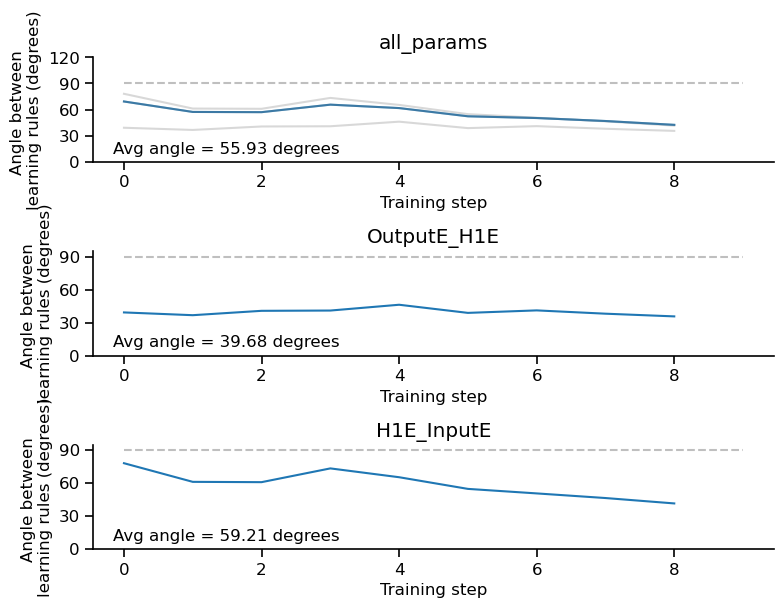

In [91]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, almostBP1, batch_size=100, constrain_params=False)

# Stepaveraged stochastic dW vs backprop with batch_size=100
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history_stepaveraged, plot=True)

  0%|          | 0/10 [00:00<?, ?it/s]

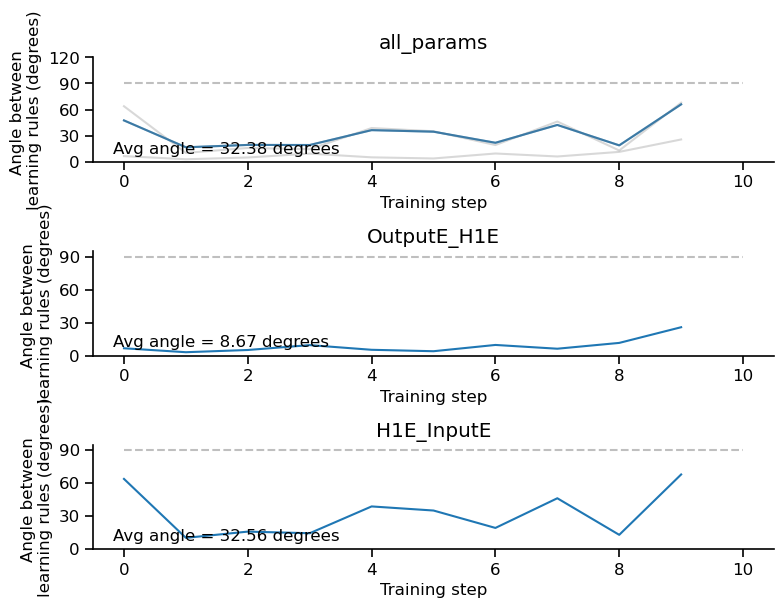

In [92]:
# Recompute dParam history with small batch size
bpClone_network = ut.compute_alternate_dParam_history(train_dataloader, almostBP1, batch_size=1, constrain_params=False)

# Stochastic dW vs backprop with batch_size=1
angles = ut.compute_dW_angles(bpClone_network.predicted_dParam_history, bpClone_network.actual_dParam_history, plot=True)

## Almost BP 3: 
 - Weight transpose
 - E = dend act = b
 - Subtract forward act using dendI